<a href="https://colab.research.google.com/github/Dhanashree2002/Linear-Regression-Self-Project-/blob/main/NYC_Taxi_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name - NYC_Taxi_Trip_Time_Prediction (Predicting total ride duration of taxi trips in New York City)




###Project Type: **Regression**
###Contribution: **Individual**


###By **Dhanashree Ashok Jadhav**
###Email: dhanashrijadhav2204@gmail.com
###Git Hub Link: https://github.com/Dhanashree2002
###LinkedIn Link: https://www.linkedin.com/in/dhanashree-jadhav-288aa4202

#Project Summary

####The NYC Taxi Time Prediction project aims to predict the amount of time a taxi trip will take in New York City, based on various features such as pickup and dropoff locations, time of day, and weather conditions.

####A regression model was developed to predict the duration of the taxi trip. The model was trained on a large dataset of over 1.5 million taxi trips, which were randomly split into training and testing sets.

####The features used in the regression model included distance, pickup and dropoff coordinates, pickup datetime, day of the week, and weather conditions such as temperature, precipitation, and wind speed.

####The model was evaluated using various metrics such as Mean Squre Error (MSE) and Root Mean Squared Error (RMSE), R2 Score, Adjusted R2-Score and was compared to other machine learning algorithms such as Linear Regression,Decision Tree Random Forest, Gradient Boosting and Xgboost. The regression model outperformed the other algorithms in terms of accuracy, with an R2 score of 67%.

####Overall, the NYC Taxi Time Prediction project demonstrates the potential for regression models to accurately predict the duration of taxi trips in New York City, using a combination of various features such as location, time, and distance.

#Problem Statement
####New York City is one of the most populous cities in the world, and its transportation system is a critical aspect of its infrastructure. Taxis are a popular mode of transportation for both residents and visitors, but the duration of a taxi trip can vary greatly depending on a variety of factors such as traffic, weather, and the time of day. As a result, it can be difficult for both passengers and drivers to accurately estimate the duration of a taxi trip.

####The goal of this project is to develop a machine learning regression model that can predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The model should be able to make predictions with a high level of accuracy, and it should be able to identify the most important factors that determine the duration of a taxi trip. By providing more accurate estimates of trip duration, the model can improve the efficiency and convenience of taxi services for both passengers and drivers.

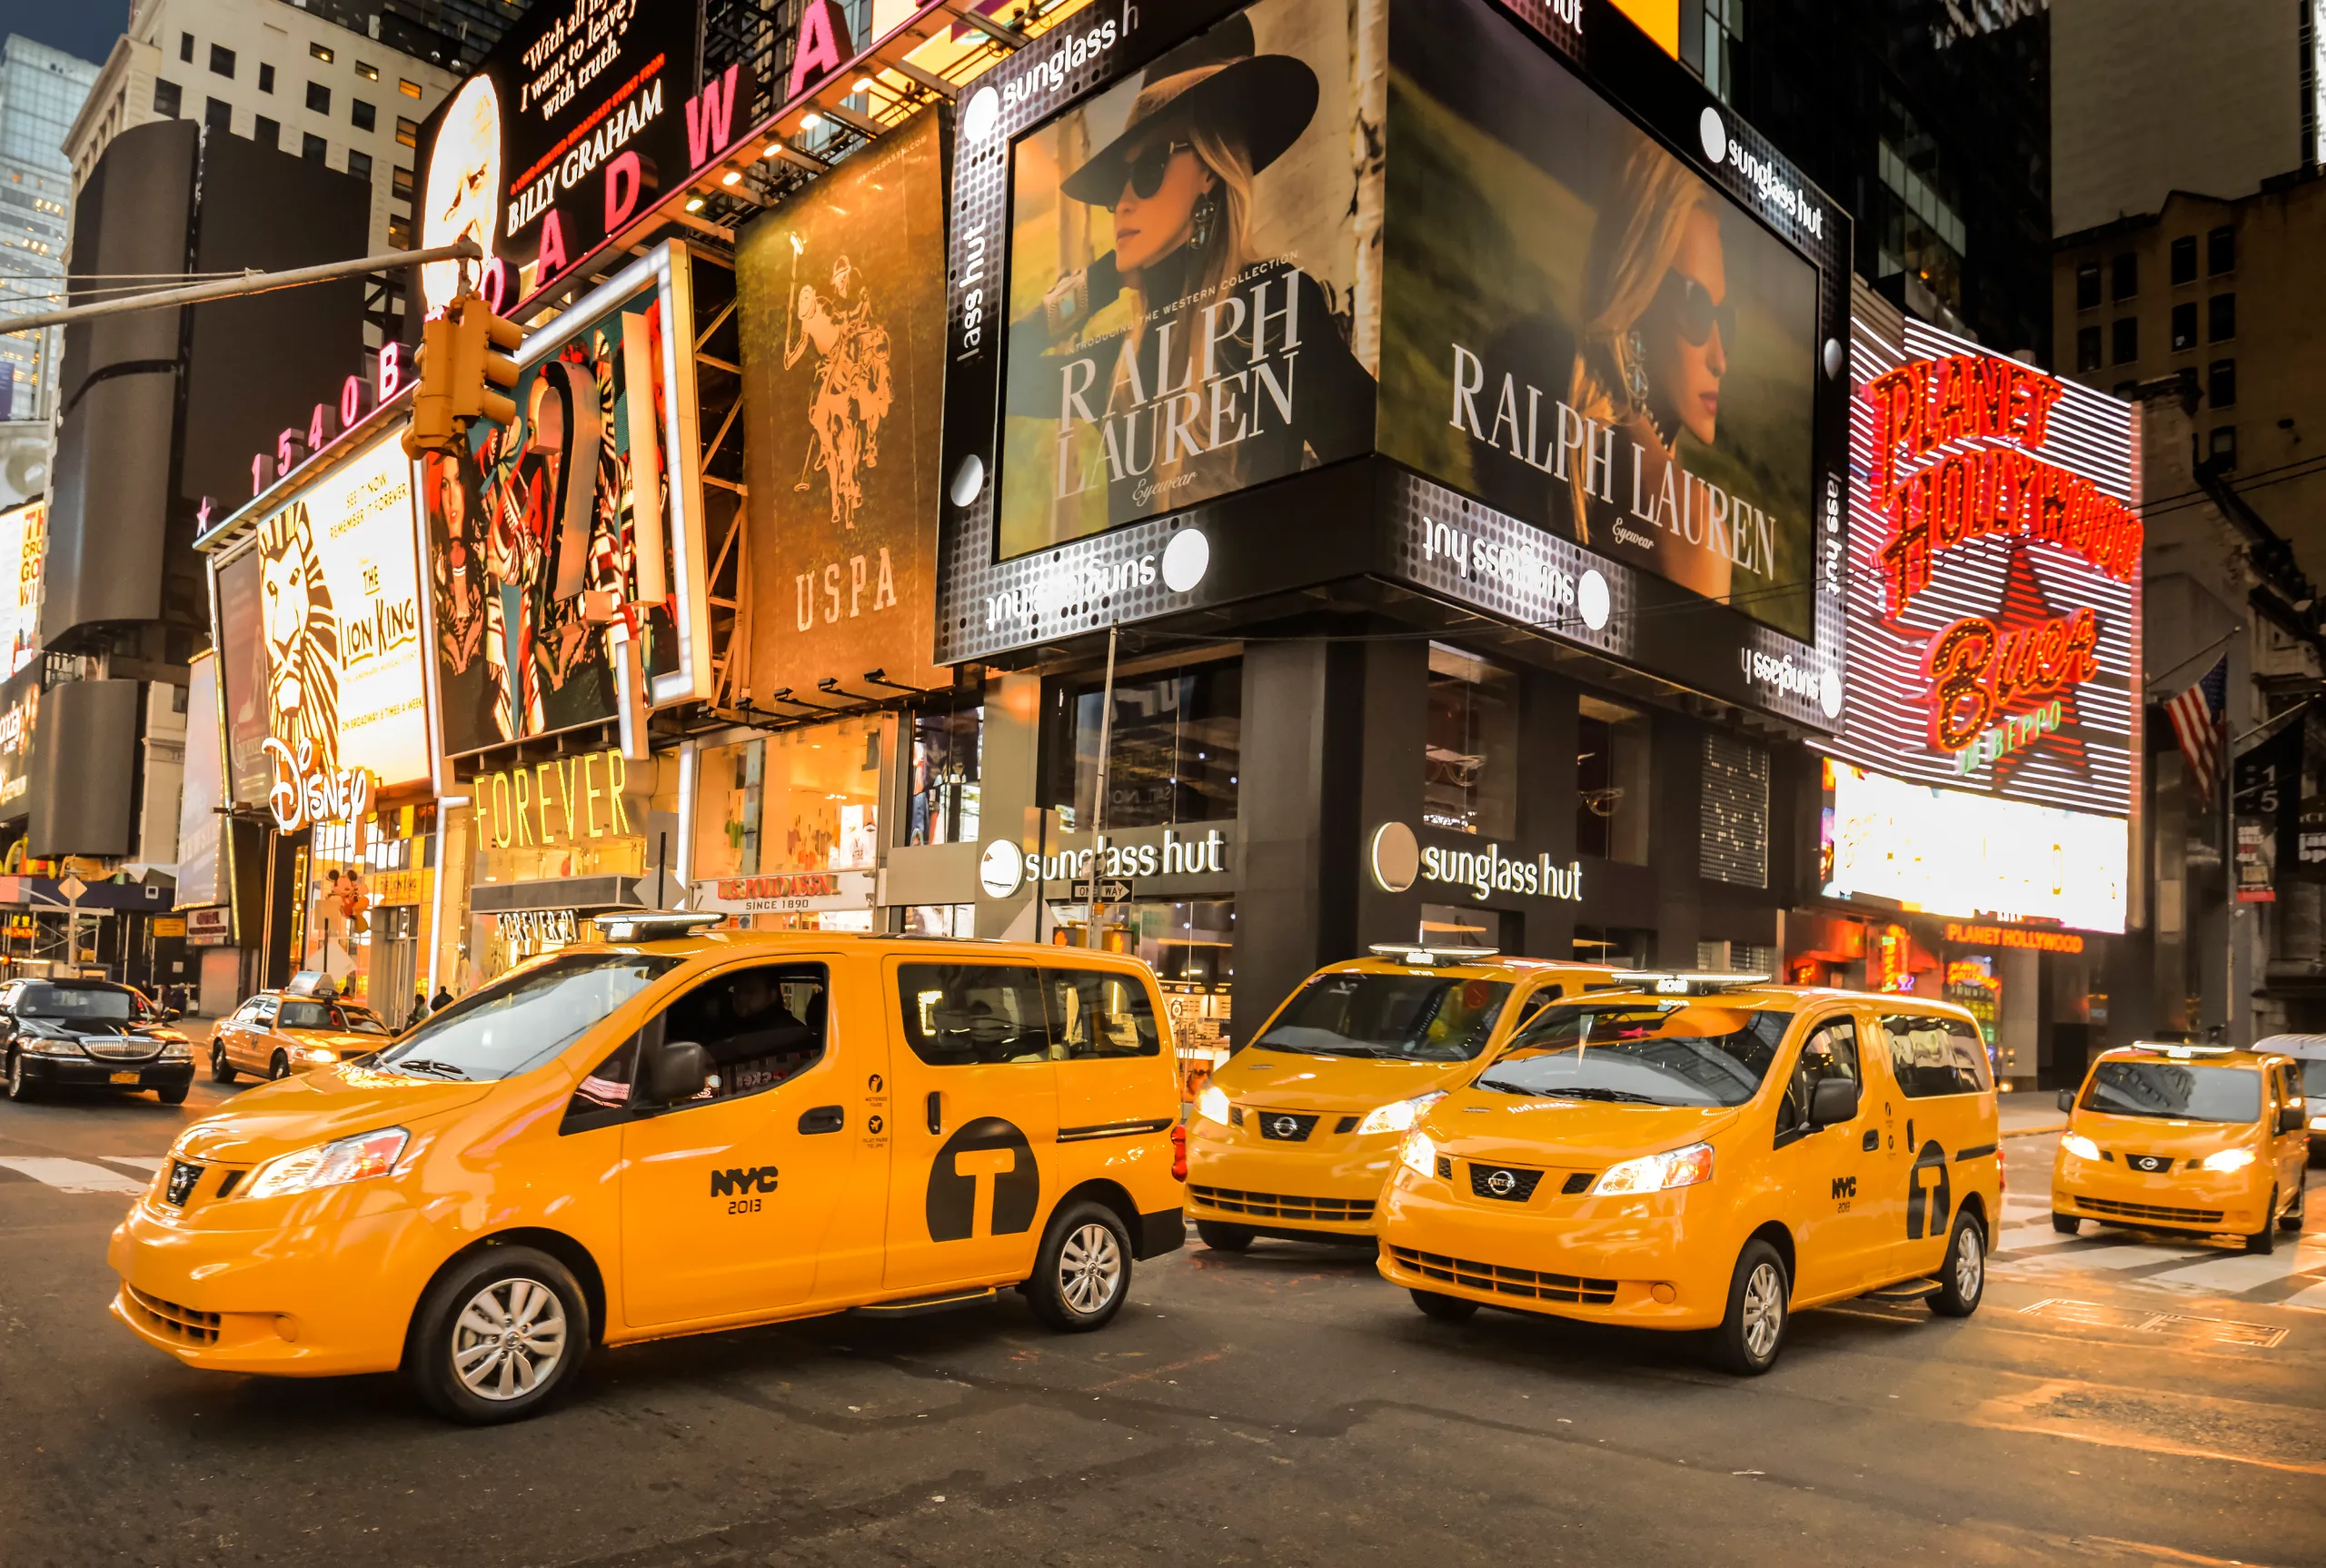

#General Guidelines : -
####Well-structured, formatted, and commented code is required.

####Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

####The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
####Each and every logic should have proper comments.

####You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
####Why did you pick the specific chart?
####What is/are the insight(s) found from the chart?
####Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
####You have to create at least 20 logical & meaningful charts having important insights.
####[Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

####U - Univariate Analysis,

####B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

####M - Multivariate Analysis ]

#Let's Begin !

#1. Know Your Data

###Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt

#Import statistics libraries
import scipy.stats as stats

#Data visualization librabies
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#importing the essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Warnnings
import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [2]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the dataset
taxi_df = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Project/NYC Taxi Data.csv',encoding='latin')

###Dataset First View

In [4]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


###Dataset Rows & Columns count

In [5]:
#dataset rows and columns count
taxi_df.shape

(1458644, 11)

###Dataset Information

In [6]:
#dataset Information
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


###Duplicated Values

In [7]:
# Dataset Duplicate Value Count
taxi_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Length: 1458644, dtype: bool

In [8]:
len(taxi_df[taxi_df.duplicated()])

0

###Missing Values/ Null Values

In [9]:
#finding the missing values/ null values count
print(taxi_df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


###What did you know about your dataset?

###NYC taxi trip duration datasets consist of historical records of taxi rides in New York City, including information such as pickup and drop-off locations, time of day, trip distance, and trip duration. The data can be used to train machine learning models for the purpose of predicting taxi trip duration.

#2. Understanding Your Variables

In [ ]:
#Dataset columns
taxi_df.columns

In [ ]:
#Dataset Describe
taxi_df.describe()

###Variables Description



###1. id - a unique identifier for each trip

###2. vendor_id - a code indicating the provider associated with the trip record

###3. pickup_datetime - date and time when the meter was engaged

###4. dropoff_datetime - date and time when the meter was disengaged

###5. passenger_count - the number of passengers in the vehicle (driver entered value)

###6. pickup_longitude - the longitude where the meter was engaged

###7. pickup_latitude - the latitude where the meter was engaged

###8. dropoff_longitude - the longitude where the meter was disengaged

###9. dropoff_latitude - the latitude where the meter was disengaged

###10. store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

###11. trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.


In [ ]:
#checking the unique values for each variable
taxi_df.nunique()

In [ ]:
taxi_df.shape

#3. Data Wrangling

###Data Wrangling Code

In [14]:
#write the code to make your data analysis ready
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [15]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [16]:
#Convert timestamp to datetime format to fetch the other details
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])

In [17]:
taxi_df['weekday_num']   = taxi_df.pickup_datetime.dt.weekday
taxi_df['month']   = taxi_df.pickup_datetime.dt.month
taxi_df['pickup_hour']   = taxi_df.pickup_datetime.dt.hour
taxi_df['pickup_minute']   = taxi_df.pickup_datetime.dt.minute
taxi_df['weekday']   = taxi_df.pickup_datetime.dt.time

#creating pickup and dropoff day name
taxi_df['pickup_day']=taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day']=taxi_df['dropoff_datetime'].dt.day_name()

#creating pickup_hour and dropoff_hour
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] =taxi_df['dropoff_datetime'].dt.hour

In [18]:
#calculating trip duration in minute
taxi_df["trip_duration_in_minute"]=taxi_df["trip_duration"]/60

In [20]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle

taxi_df['distance'] = taxi_df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


In [21]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekday_num,month,pickup_hour,pickup_minute,weekday,pickup_day,dropoff_day,dropoff_hour,trip_duration_in_minute,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,3,17,24,17:24:55,Monday,Monday,17,7.583333,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,43,00:43:35,Sunday,Sunday,0,11.050000,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,35,11:35:24,Tuesday,Tuesday,12,35.400000,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,4,19,32,19:32:31,Wednesday,Wednesday,19,7.150000,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,3,13,30,13:30:55,Saturday,Saturday,13,7.250000,1.188590


###What all manipulations have you done and insights you found?


###1.   Converted timstamp to datetime format to fetch the other details like weekday_num and months
###2. Created new columns to identify the data more clearly.
###3. Also we have found the trip duration how much time it takes.



#4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

###Chart - 1 - Data visualization of Dependant Variable (Univariate)

In [28]:
#percantage of trip by vendor
percentage_of_vendor_1 = round(len(taxi_df[taxi_df["vendor_id"]==1])/len(taxi_df)*100,1)
percentage_of_vendor_2 = round(len(taxi_df[taxi_df["vendor_id"]==2])/len(taxi_df)*100,1)
total_percentage = [percentage_of_vendor_1, percentage_of_vendor_2]
print(total_percentage)

[46.5, 53.5]


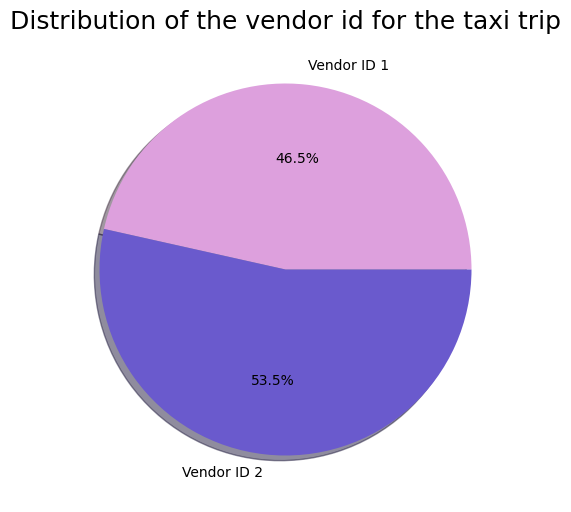

In [29]:
plt.figure(figsize = (6,8))
color=['plum','slateblue']
plt.pie(total_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=color,shadow=True)
plt.title('Distribution of the vendor id for the taxi trip',fontsize=18)
plt.show()

1. Why did you pick the specific chart?

Pie chart are best used to represent parts of a whole, where the individual pieces represent a proportion of the total data.

2. What is/are the insight(s) found from the chart?


As we can see, there are only two vendors (1 and 2). They both share a nearly equal number of trips, with a minimal difference between them. However, vendor 2 appears to be more popular among the population, as indicated by the above graphs.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   In a business strategy, this information can be used to make informed decisions regarding vendor selection and allocation of resources:
*   If both vendors are performing equally well in terms of number of trips, the company may choose to focus more on promoting vendor 2 as it appears to be more popular among the population.
*  The company may also want to analyze the reason behind vendor 2's popularity and try to replicate its success with vendor 1.




###Chart - 2

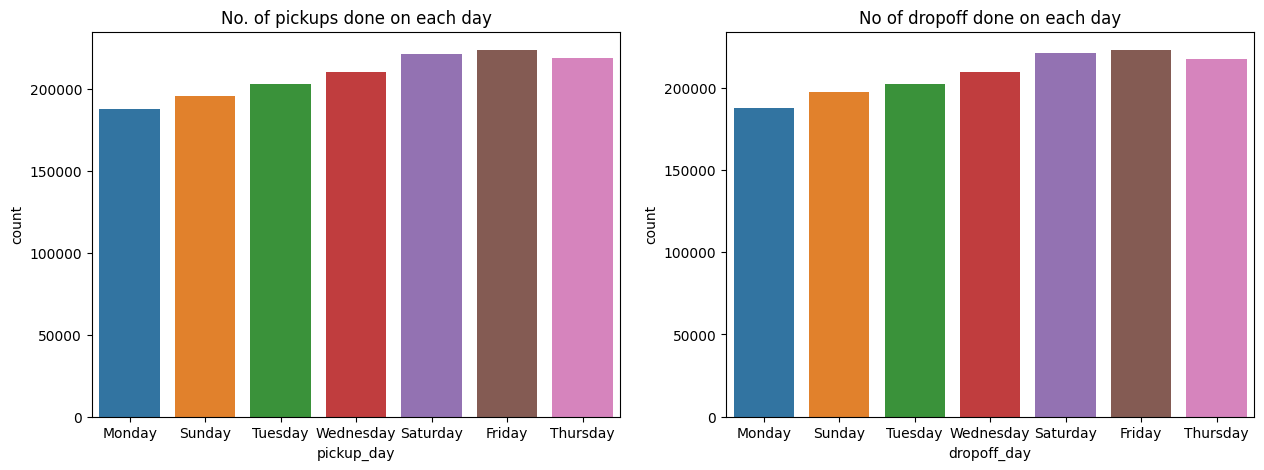

In [24]:
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=taxi_df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x='dropoff_day',data = taxi_df,ax=ax[1])
ax[1].set_title('No of dropoff done on each day')
plt.show()

1. Why did you pick the specific chart?

  Above plot show us the distribution of each day of pickup and drop off and we can clearly find insights

2. What is/are the insight(s) found from the chart?

The no of pickup and no of dropoff done by each day shows us the saturday and friday have higher nos of passengers rates.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

We can see that compared to other days, taxi booking rates are higher on the weekends ( Friday and Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

###Chart - 3  

In [30]:
#diving the time in to different timezone
def timezone(x):
  if x>=6 and x<10:
    return 'morning'
  elif x>=10 and x<16:
    return 'mid day'
  elif x>=16 and x<22:
    return 'evening'
  elif x>=22 and x<6:
    return 'late night'

In [31]:
#apply the function
taxi_df['pickup_time_zone'] = taxi_df.pickup_hour.apply(timezone)
taxi_df['dropoff_time_zone'] = taxi_df.dropoff_hour.apply(timezone)

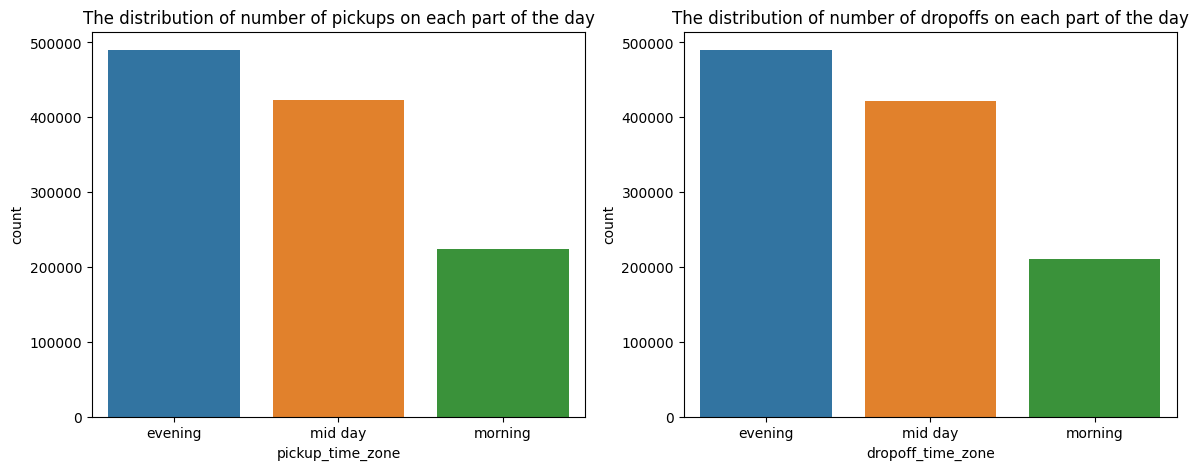

In [32]:
#Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,5))
sns.countplot(x='pickup_time_zone',data=taxi_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=taxi_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

1. Why did you pick the specific chart?

The above Subplot can easily specify the differenciation among other timezone that we can understand the data.

2. What is/are the insight(s) found from the chart?

we can see that evening is the busy time of whole day. people take the taxi to come from office and going for party at evening and dinner. after that at mid day maximum ride taken because people were going to office after 10 am.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the evening and mid day time zone have higher passenger number so we can insure that every passenger shoulde be reach out their place safely.

###Chart - 4

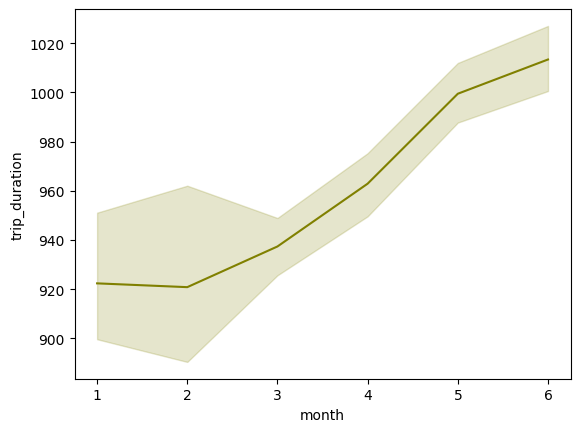

In [33]:
#Trip duration by the month
sns.lineplot(x ='month',y ='trip_duration',data= taxi_df,color='olive')
plt.show()

1. Why did you pick the specific chart?

The lineplot, are used to represent the distribution of a set of values. They show the frequency of occurrence of values within a range, allowing you to visualize the shape and spread of the data of trip duration.

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



###Chart - 5

1. Why did you pick the specific chart?



2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



###Chart - 6

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 7

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 8

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 9

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 10

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 11

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 12

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

###Chart - 13

1. Why did you pick the specific chart?

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.